In [1]:
import datetime
import time

from pycds import *
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy import and_, or_
from sqlalchemy.sql import func
from sqlalchemy import funcfilter
from sqlalchemy import within_group
from sqlalchemy import select

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pgpasslib

In [2]:
connection_string = "postgresql+psycopg2://nannau@dbmsc.pcic.uvic.ca/msc"
engine = create_engine(connection_string)
Session = sessionmaker(bind = engine)
session = Session()
session.flush()

In [3]:
year = 2000 
month = 1
day = 1
interval = 1
yr_interval = 1

start_year = datetime.datetime(year, month, day)
end_year = datetime.datetime(year + yr_interval, month, day)

start_time = datetime.datetime(year, month, day)
end_time = datetime.datetime(year + 5, month + interval, day)

In [4]:
query = session.query(Variable.description, Variable.id)
df_vars = pd.read_sql(query.statement, engine)

In [5]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', 5):
    print(df_vars)

     long_description  vars_id
0                Hail     1401
1       Smoke or Haze     1424
..                ...      ...
205   Air temperature     1510
206  Lake evaporation     1511

[207 rows x 2 columns]


In [17]:
start = time.time()
station_list = [station[0] for station in session.query(History.station_id).limit(10000).all()]

df_percentiles = pd.DataFrame()
df_list = []
session = Session()

for station in station_list:
    q_datum = session.query(Obs.datum) \
    .filter(History.station_id == (station, )) \
    .filter(or_(Variable.description == "Air temperature", Variable.id == 1510)) \
    .filter(func.extract("month", Obs.time) == 1) \
    .join(History)

    df = pd.read_sql(q_datum.statement, engine)
    df = df[df['datum'] != 0.0]
    
    q_meta = session.query(Obs) \
    .filter(History.station_id == (station, )) \
    .filter(or_(Variable.description == "Air temperature", Variable.id == 1510)) \
    .filter(func.extract("month", Obs.time) == 1) \
    .join(History)
    if q_meta.first() != None:
        qid = q_meta.first().history.station_id
        qlat = q_meta.first().history.lat
        qlon = q_meta.first().history.lon
        percentile = df.quantile(0.01)

    df_list.append(pd.DataFrame([[qid, qlat, qlon, percentile['datum']]]))

df_percentiles = pd.concat(df_list)
df_percentiles = df_percentiles.rename(columns={0:'station_id', 1:'lat', 2:'lon', 3:'temp'})
df_percentiles
end = time.time()
print('{} seconds, {} minutes'.format(end - start, (end - start)/60.))

10007.031664848328 seconds, 166.78386108080545 minutes


In [18]:
df_percentiles
#sns.distplot(df_all_temp['datum'])

,station_id,lat,lon,temp
0,6,48.8667,-123.283,2.00
0,7,48.4,-123.483,-16.88
0,8,48.5833,-123.517,3.00
0,9,48.5,-124,-72.00
0,10,48.5,-123.35,3.00
0,11,48.3333,-123.633,-61.00
0,12,48.6,-123.467,2.68
0,13,48.5667,-123.45,2.65
0,14,48.5667,-123.433,3.00
0,15,48.5833,-123.417,2.00


In [8]:
#df_all_temp['datum'].hist()

In [9]:
session = Session()
session.flush()

def baseline(start_time, end_time):
    query = session.query(Obs.datum, Obs.time, Variable.standard_name, History.station_id).filter(Obs.time <= end_time).filter(Obs.time >= start_time).join(History).join(Variable)
    return query

def precip_query(start_time, end_time):
    query = baseline(start_time, end_time).filter(Variable.standard_name == "lwe_thickness_of_precipitation_amount").filter(or_(Variable.description == "Total precipiation", Variable.id == 1397))
    return query

def temp_query(start_time, end_time):
    query = baseline(start_time, end_time).filter(Variable.standard_name == "air_temperature").filter(or_(Variable.description == "Air temperature", Variable.id == 1510))
    return query

def annual_rain(start_year, end_year, mean = True):
    yr_interval = float(np.abs(end_year.year - start_year.year))
    print(yr_interval)
    query = session.query(func.sum(Obs.datum*0.1/yr_interval).label("sum"), func.max(Obs.time).label("max_date"), History.lat, History.lon, History.station_id).group_by(History).having(func.max(Obs.time) >= end_year).filter(Variable.standard_name == "lwe_thickness_of_precipitation_amount").filter(or_(Variable.description == "Total precipiation", Variable.id == 1397))
    query = query.filter(Obs.time <= end_year).filter(Obs.time >= start_year).join(History).join(Variable)
    return query

def design_temp_25(month=1):

    query = session.query(func.percentile_cont(0.025).within_group(
                    Obs.datum.asc()).label("temp"),
                    func.min(Obs.time).label("time_min"),
                    func.max(Obs.time).label("time_max"),
                    History.lat,
                    History.lon,
                    History.station_id,
                    History.station_name.label("station_name")).group_by(History) \
                    .filter(and_(Variable.standard_name == 'air_temperature',
                                 Variable.id == 1510)) \
                    .filter(func.extract("month", Obs.time) == 1).join(History)
    
    return query

def design_temp_1(month=1):

    query = session.query(func.percentile_cont(0.01).within_group(
                            Obs.datum.asc()).label("temp"),
                            func.min(Obs.time).label("time_min"),
                            func.max(Obs.time).label("time_max"),
                            History.lat,
                            History.lon,
                            History.station_id,
                            History.station_name).group_by(History) \
                            .filter(and_(Variable.standard_name == 'air_temperature',
                                         Variable.id == 1510)) \
                            .filter(func.extract("month", Obs.time) == 1).join(History)

    return query

def design_temp_25_wet(month=7):

    query = session.query(func.percentile_cont(0.025).within_group(
                          Obs.datum.desc()).label("wet_temp"),
                          func.min(Obs.time).label("time_min"),
                          func.max(Obs.time).label("time_max"),
                          History.lat,
                          History.lon,
                          History.station_id).group_by(History) \
                          .filter(and_(Variable.standard_name == 'air_temperature',
                                       Variable.id == 1300)) \
                          .filter(func.extract("month", Obs.time) == month).join(History)

    return query

def design_temp_25_dry(month=7):

    query = session.query(func.percentile_cont(0.025).within_group(
                            Obs.datum.desc()).label("dry_temp"),
                            func.min(Obs.time).label("time_min"),
                            func.max(Obs.time).label("time_max"),
                            History.lat,
                            History.lon,
                            History.station_id).group_by(History) \
                            .filter(and_(Variable.standard_name == 'air_temperature',
                                         Variable.id == 1299)) \
                            .filter(func.extract("month", Obs.time) == month).join(History)

    return query

def show_design_values():
    query = session.query(Variable.standard_name, Variable.description, Variable.unit, Variable.id)
    return query

In [10]:
q_1 = design_temp_25_wet()

start = time.time()
df_1 = pd.read_sql(q_1.statement, engine)
end = time.time()

print('{} seconds, {} minutes'.format(end - start, (end - start)/60.))


354.6911311149597 seconds, 5.911518851915996 minutes


In [13]:
#q_1 = design_temp_1()
#q_25 = design_temp_25(start_year, end_year)
df_1

,wet_temp,time_min,time_max,lat,lon,station_id


/home/nannau/Desktop/map-xtreme/venv2/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)


ZeroDivisionError: division by zero

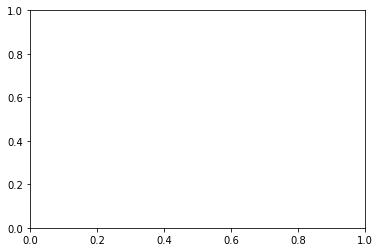

In [12]:
sns.distplot(df_1['wet_temp'])
#df_filtered = df_1[df_1['temp'] == 0.0]
#df_filtered

In [12]:
df_1.sort_values(by='lat', ascending=False)

,temp,time_min,time_max,lat,lon,station_id,station_name
1970,-417.000,1951-01-01 00:00:00,2006-01-31 00:00:00,82.5178,-62.2806,2168,ALERT
1971,-371.000,2005-01-01 00:00:00,2018-01-16 10:00:00,82.5000,-62.3333,2171,ALERT CLIMATE
1972,-390.700,1997-01-04 00:00:00,2018-01-10 00:00:00,82.5000,-62.3333,2172,ALERT UA
2042,-500.000,1958-01-01 00:00:00,1958-01-31 00:00:00,81.8167,-71.3000,2258,LAKE HAZEN
2076,-396.000,2012-01-18 00:00:00,2018-01-16 08:00:00,81.1608,-91.8164,2302,SVARTEVAEG
2013,-448.000,2016-01-29 00:00:00,2018-01-12 09:00:00,79.9944,-85.8119,2222,EUREKA A
2014,-449.000,2017-01-01 06:00:00,2018-01-12 09:00:00,79.9944,-85.8119,2223,EUREKA A
2011,-448.000,2014-01-01 06:00:00,2018-01-16 09:00:00,79.9892,-85.9339,2220,EUREKA CLIMATE
2012,-461.000,1948-01-01 00:00:00,2016-01-31 00:00:00,79.9833,-85.9333,2221,EUREKA A
2037,-440.000,1991-01-01 07:00:00,2017-01-22 00:00:00,78.7922,-103.5540,2251,ISACHSEN (AUT)


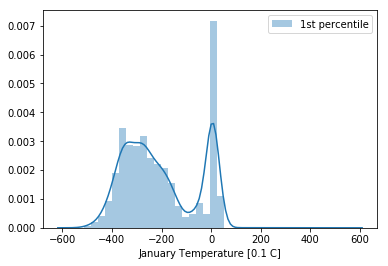

In [93]:
sns.distplot(df_1['temp'], label = "1st percentile")#.hist()
#sns.distplot(df_25['temp'], label = "2.5th percentile")
plt.xlabel("January Temperature [0.1 C]" )
plt.legend()
plt.savefig("jan_air_temp_percentiles")
plt.show()

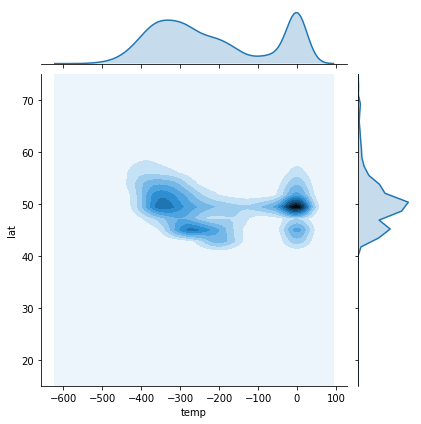

In [36]:
#ax = sns.jointplot(x="temp", y="lat", kind = 'kde', data=df, label = '1st percentile')
#plt.ylim(15., 75.)
#plt.savefig("kde_density_1st_temp")

ax = sns.jointplot(x="temp", y="lat", kind = 'kde', data=df_1, label = '2.5th percentile')
plt.ylim(15., 75.)
plt.savefig("kde_density_25th_temp")

#sns.jointplot(x="anon_1", y="lat", kind=   'kde', data=df1)
#plt.title('Joint Plot of Temp Distribution with Latitude 2nd percentile')
#plt.xlabel('Temperature [0.1 C]')
#plt.ylim(25., 75.)

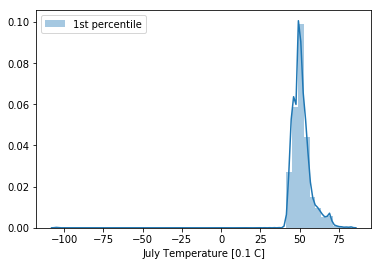

In [9]:
sns.distplot(df['lat'], label = "1st percentile")#.hist()
#sns.distplot(df1['lat'], label = "2.5th percentile")
plt.xlabel("July Temperature [0.1 C]" )
plt.legend()
plt.savefig("july_air_temp_percentiles")
plt.show()

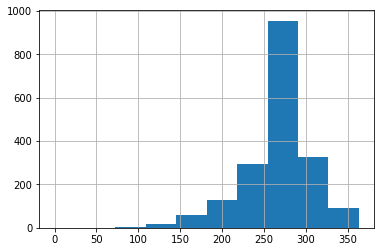

In [13]:
df['anon_1'].hist() 

In [ ]:
sns.distplot(df['datum'])
plt.xlabel('July Temperature [0.1 C]')
plt.ylabel('KDE Frequency')
plt.savefig('temp_percentile_25')

In [9]:
plt.scatter(df['lon'], df['lat'])
plt.ylim(45, 60)

KeyError: 'lon'